In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading Train dataset
df_train=pd.read_csv('E://EXCELR//Data science//Data science assignment//12) Naive Bayes//SalaryData_Train.csv')
df_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
263,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
264,57,Federal-gov,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
265,41,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
266,50,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,45,United-States,<=50K
267,25,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United States,<=50K


In [8]:
# Loading test dataset
df_test=pd.read_csv('E://EXCELR//Data science//Data science assignment//12) Naive Bayes//SalaryData_Test.csv')
df_test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            268 non-null    int64 
 1   workclass      268 non-null    object
 2   education      268 non-null    object
 3   educationno    268 non-null    int64 
 4   maritalstatus  268 non-null    object
 5   occupation     268 non-null    object
 6   relationship   268 non-null    object
 7   race           268 non-null    object
 8   sex            268 non-null    object
 9   capitalgain    268 non-null    int64 
 10  capitalloss    268 non-null    int64 
 11  hoursperweek   268 non-null    int64 
 12  native         268 non-null    object
 13  Salary         268 non-null    object
dtypes: int64(5), object(9)
memory usage: 29.4+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
df_train['Salary'].unique()

array([' <=50K', ' >50K', '<=50K'], dtype=object)

In [12]:
print('Shape of train dataframe before dropping duplicates',df_train.shape)
print('Shape of test dataframe before dropping duplicates',df_test.shape)

Shape of train dataframe before dropping duplicates (268, 14)
Shape of test dataframe before dropping duplicates (15060, 14)


In [13]:
df_train.drop_duplicates(keep=False,inplace=True)

In [14]:
df_test.drop_duplicates(keep=False,inplace=True)

In [15]:
print('Shape of train dataframe after dropping duplicates',df_train.shape)
print('Shape of test dataframe after dropping duplicates',df_test.shape)

Shape of train dataframe after dropping duplicates (268, 14)
Shape of test dataframe after dropping duplicates (13450, 14)


In [16]:
df_train.drop('native',axis=1,inplace=True)

In [17]:
df_test.drop('native',axis=1,inplace=True)

In [18]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [19]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [20]:
# Label Encoding Categorical Columns of train and test dataset

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.fit_transform(df_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [21]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,7,13,4,0,1,4,1,2174,0,40,0
1,50,4,7,13,2,2,0,4,1,0,0,13,0
2,38,2,9,9,0,4,1,4,1,0,0,40,0
3,53,2,1,7,2,4,0,2,1,0,0,40,0
4,28,2,7,13,2,7,5,2,0,0,0,40,0


In [22]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [23]:
# Checking output col of train dataset
df_train['Salary'].value_counts()

0    201
1     66
2      1
Name: Salary, dtype: int64

In [24]:
print("Percent of data labelled as 0:",((df_train['Salary']==0).sum()/len(df_train)*100))
print("Percent of data labelled as 1:",((df_train['Salary']==1).sum()/len(df_train)*100))

Percent of data labelled as 0: 75.0
Percent of data labelled as 1: 24.62686567164179


# feature selection on train dataset using Extra tree classifiers

In [25]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [26]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.13251026 0.07758389 0.07440513 0.14126458 0.08673675 0.10673772
 0.06556766 0.0442413  0.02573847 0.10640079 0.03613095 0.1026825 ]


In [28]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [29]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

educationno      0.141265
age              0.132510
occupation       0.106738
capitalgain      0.106401
hoursperweek     0.102683
maritalstatus    0.086737
workclass        0.077584
education        0.074405
relationship     0.065568
race             0.044241
capitalloss      0.036131
sex              0.025738
dtype: float64

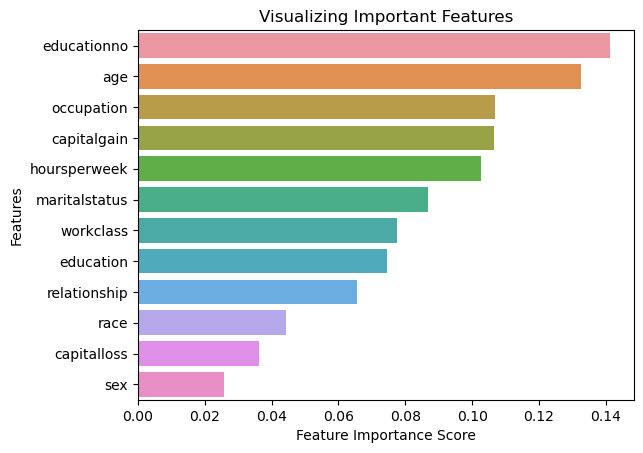

In [30]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [31]:
## Dropping the fivecolumns having least feature importance
df_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [32]:
## dropping the same columns from test dataset
df_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [33]:
df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,2,0,0,13,0
2,38,9,0,4,1,0,40,0
3,53,7,2,4,0,0,40,0
4,28,13,2,7,5,0,40,0


In [34]:
df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0


In [35]:
df_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,268.000000,268.000000,268.000000
mean,38.455224,617.436567,40.809701
std,13.184724,2458.298288,11.496831
min,17.000000,0.000000,1.000000
25%,28.000000,0.000000,40.000000
50%,37.000000,0.000000,40.000000
75%,47.000000,0.000000,43.250000
max,90.000000,15024.000000,98.000000


In [36]:
df_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting on train data
scaler.fit(df_train[['age','capitalgain','hoursperweek']])

# Transforming train data
df_train[['age','capitalgain','hoursperweek']]= scaler.transform(df_train[['age','capitalgain','hoursperweek']])

# Transforming test data
df_test[['age','capitalgain','hoursperweek']]= scaler.transform(df_test[['age','capitalgain','hoursperweek']])

In [38]:
## Checking train dataset after standardization

df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,0.041396,13,4,0,1,0.634372,-0.070560,0
1,0.877256,13,2,2,0,-0.251634,-2.423427,0
2,-0.034591,9,0,4,1,-0.251634,-0.070560,0
3,1.105218,7,2,4,0,-0.251634,-0.070560,0
4,-0.794464,13,2,7,5,-0.251634,-0.070560,0


In [39]:
## Checking test dataset after standardization

df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.022425,7,4,6,3,-0.251634,-0.070560,0
1,-0.034591,9,2,4,0,-0.251634,0.800872,0
2,-0.794464,12,2,10,0,-0.251634,-0.070560,1
3,0.421332,10,2,6,0,2.881584,-0.070560,1
4,-0.338540,6,4,7,1,-0.251634,-0.941992,0


In [40]:
## Checking output variable of train data
df_train['Salary'].value_counts()

0    201
1     66
2      1
Name: Salary, dtype: int64

# creating naive bays model

In [58]:
# Splitting train data

X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]

In [59]:
# Splitting test data

X_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

In [60]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred =  nb.predict(X_test)

In [61]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, y_pred)
conf_matrix1

array([[9637,  455,    1],
       [2309, 1048,    0],
       [   0,    0,    0]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

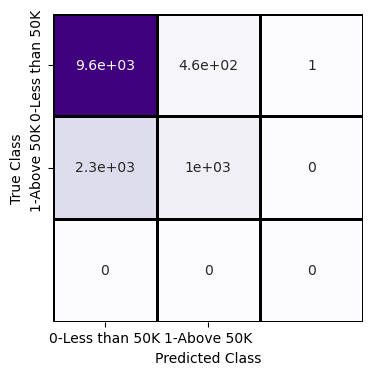

In [46]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

In [74]:
pip install sklearn--crfsuite

     -------------------------------------- 155.5/155.5 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn_crfsuite.utils import flatten

In [83]:
import sklearn.metrics as metrics

In [101]:
Y_test=y_test
y_pred=y_pred
names=['0--<=50K','1-->= 50k','2--=50k']
print(classification_report(Y_test,y_pred,target_names=names))

              precision    recall  f1-score   support

    0--<=50K       0.81      0.95      0.87     10093
   1-->= 50k       0.70      0.31      0.43      3357
     2--=50k       0.00      0.00      0.00         0

    accuracy                           0.79     13450
   macro avg       0.50      0.42      0.44     13450
weighted avg       0.78      0.79      0.76     13450



C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model has a good precision and high recall for label 0.

The model has good precision but very low recall for label 1. A recall of 0.23% means the model was able to identify only 23% of all the 1-labelled data present in test dataset.

So the model performs quite well for classifying label 0 data with high recall and moderate precision.